In [13]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from pathlib import Path
from time import sleep
from IPython.display import display, Image
import json

In [14]:
twitter_data_path = Path('../data/twitter_posts.csv')
twitter_df = pd.read_csv(twitter_data_path)

**Twitter**

In [15]:
class TwitterPosts:
    
    def __init__(self, dataframe):
        self.df = dataframe
        
    def get_screens(self, metric, method, credentials):
        """
        - metric: Metric to evaluate - Impressions or Engagement Rate  (str)
        - method: Top 3 or bottom 3 (str)
        - credentials: Path to find dictionary containing username and password keys (str)
        """
        self.metric = metric
        self.credential_path = Path(credentials)
        self.credentials = json.load(open(self.credential_path))
        self.driver = webdriver.Chrome('../helpers/chromedriver.exe')
                
        self.sorted_df = (self.df.sort_values(by=self.metric, ascending=False)
                                 .reset_index()
                         )
        
        if method == 'top':
            self.urls = self.sorted_df['Tweet link'][:3]
        elif method == 'bottom':
            self.urls = self.sorted_df['Tweet link'][-3:]
               
        #Open first URL
        self.driver.get(self.urls[0])
        sleep(1)
        
        #Find and close cookiebar
        self.driver.find_element_by_xpath('//*[@id="layers"]/div/div[2]/div/div/div/div[2]').click()
        sleep(1)
        
        #Sign in
        self.driver.get('https://twitter.com/login')
        sleep(1)
        
        username_input=self.driver.find_element_by_name("session[username_or_email]")
        password_input=self.driver.find_element_by_name("session[password]")
        username_input.send_keys(self.credentials['username'])
        password_input.send_keys(self.credentials['password'])
        password_input.send_keys(Keys.ENTER)
        sleep(1)
        
        #Zoom out
        self.driver.get('chrome://settings/')
        self.driver.execute_script('chrome.settingsPrivate.setDefaultZoom(0.80);')
        
        #Take screenshots 
        for idx, url in enumerate(self.urls):
            
            self.driver.get(url) 
            sleep(1)
            
            self.article = self.driver.find_element_by_tag_name('html').screenshot(f'../images/twitter_{idx+1}.png')
            display(Image(f'../images/twitter_{idx+1}.png'))
        
        self.driver.quit()

In [16]:
twitter = TwitterPosts(twitter_df)

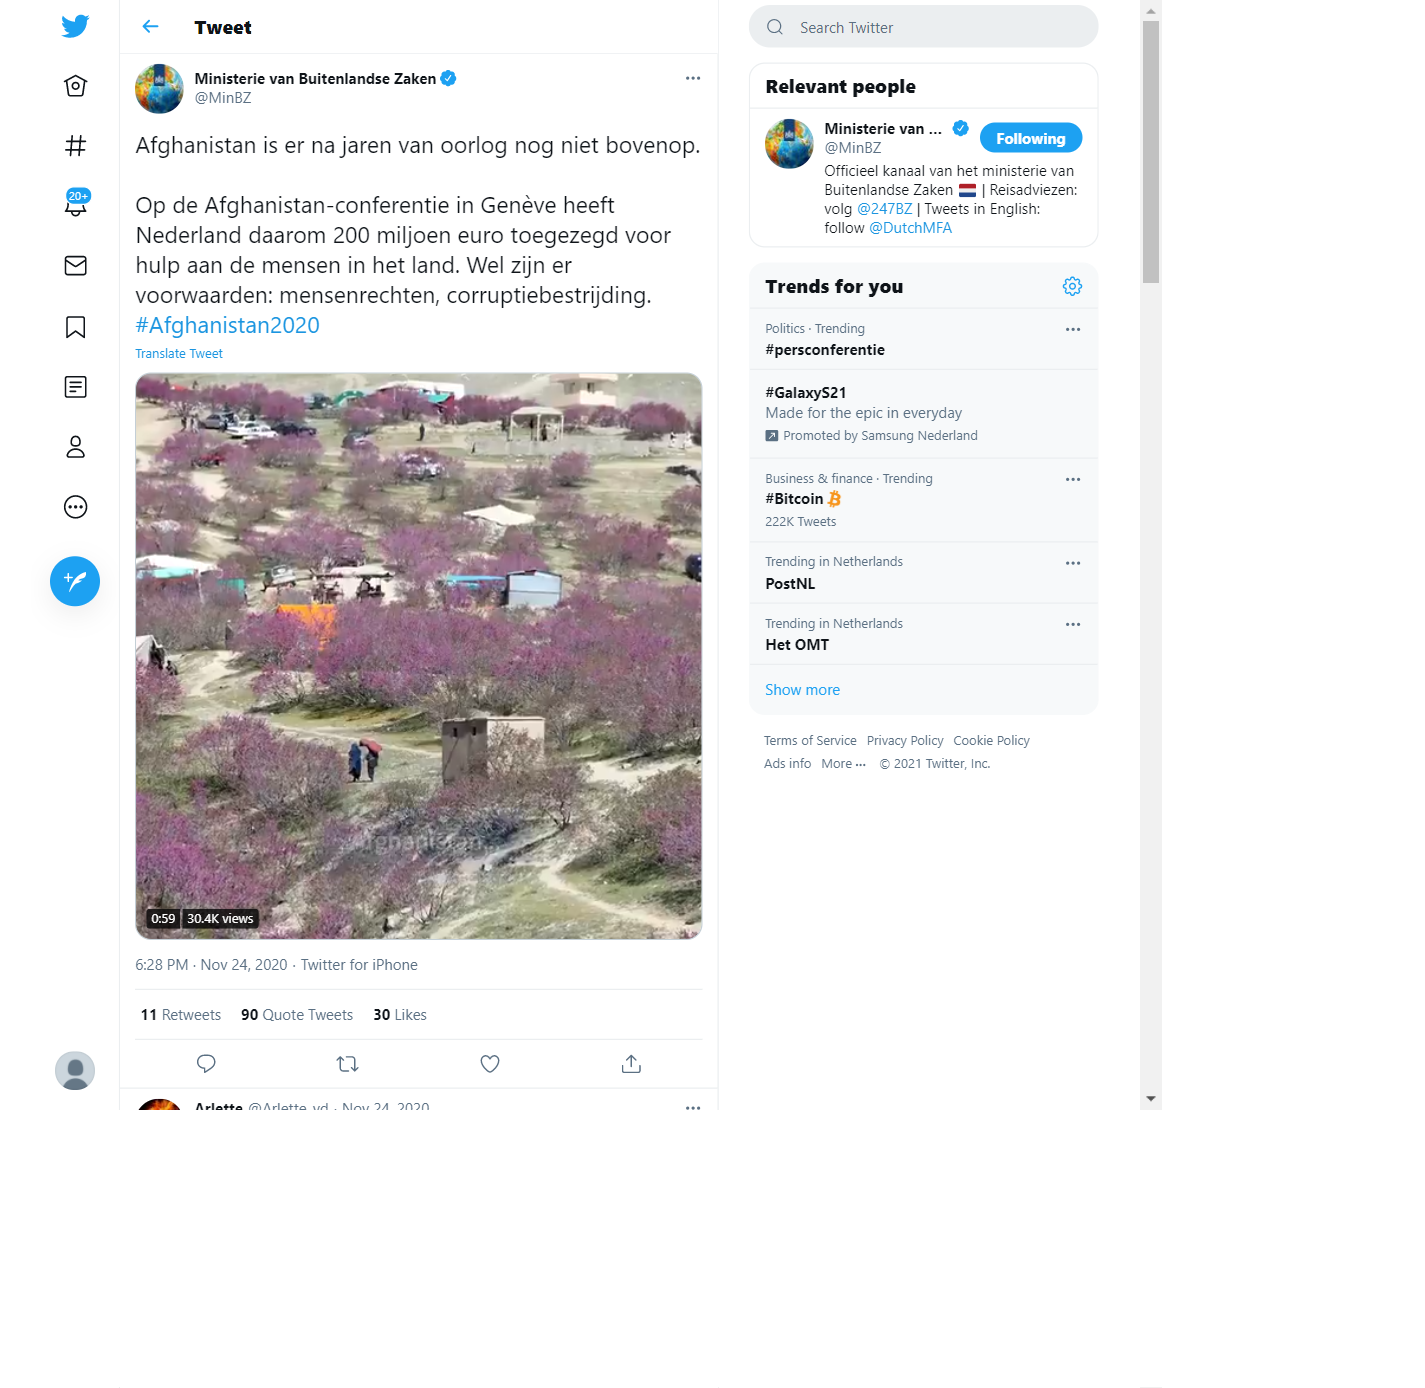

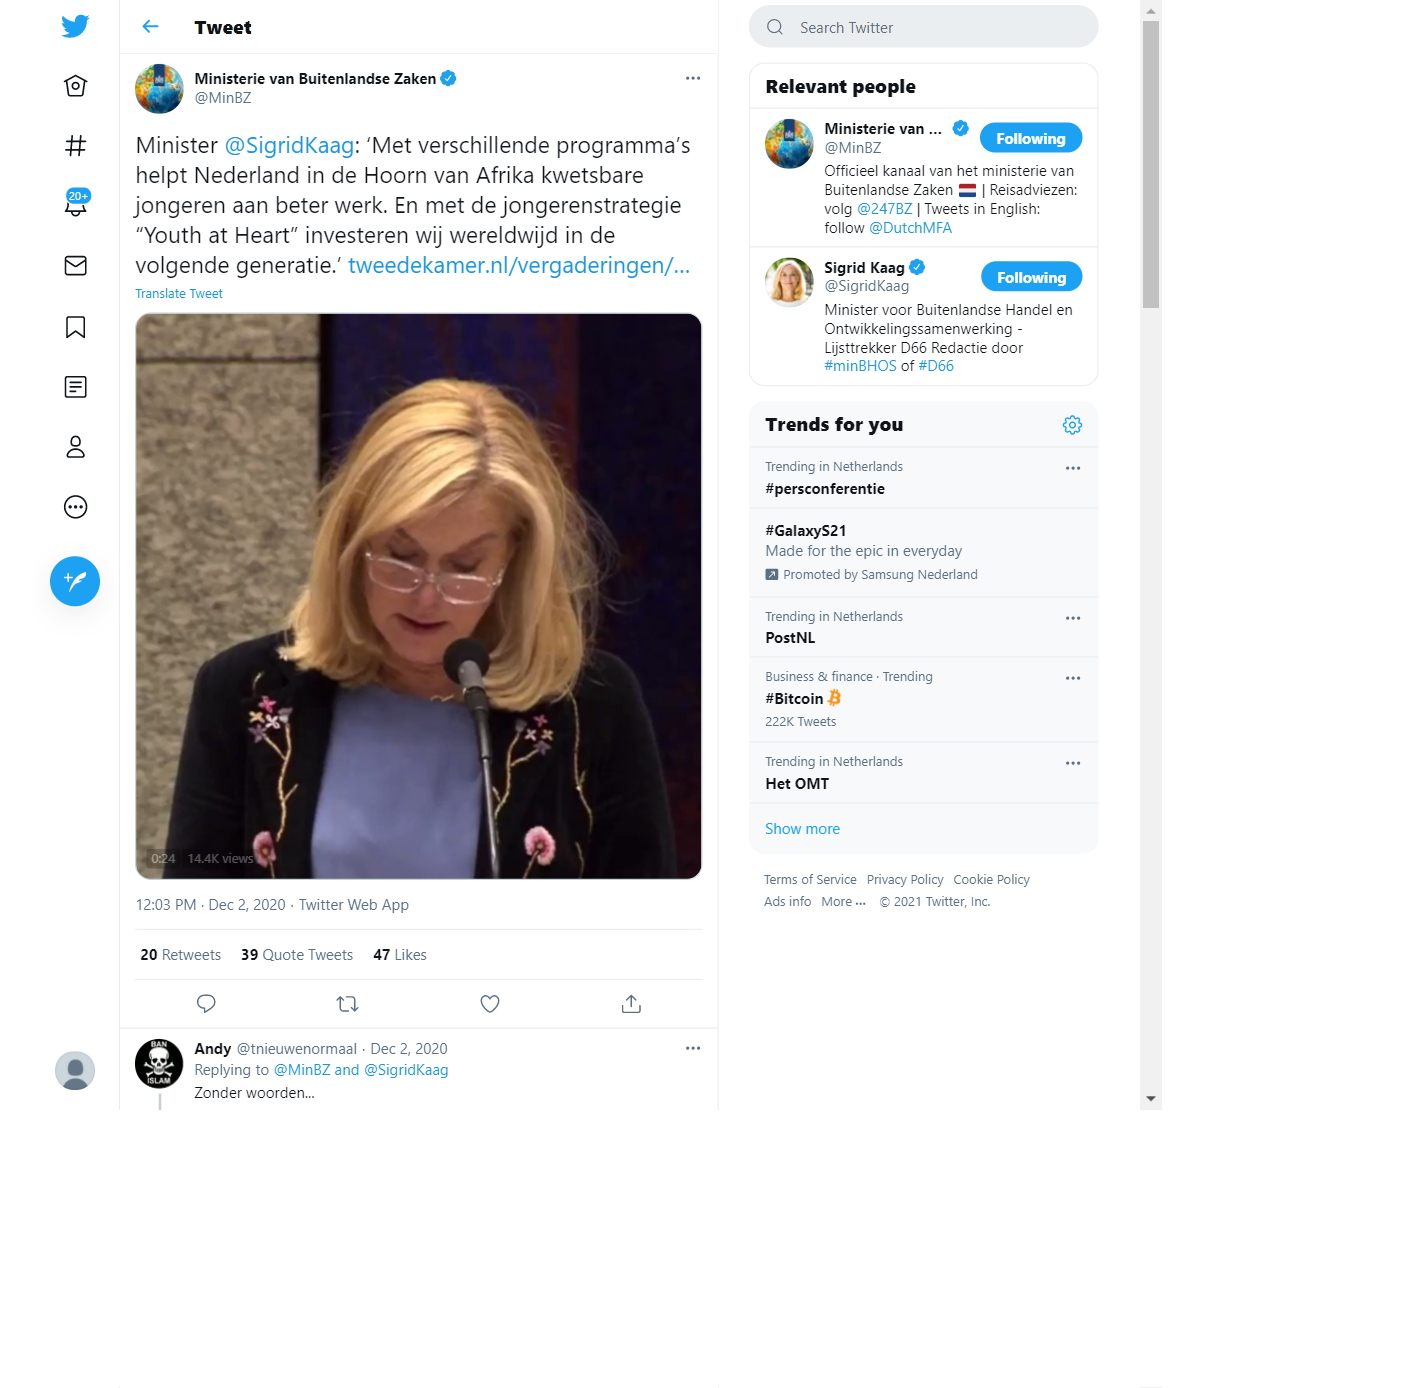

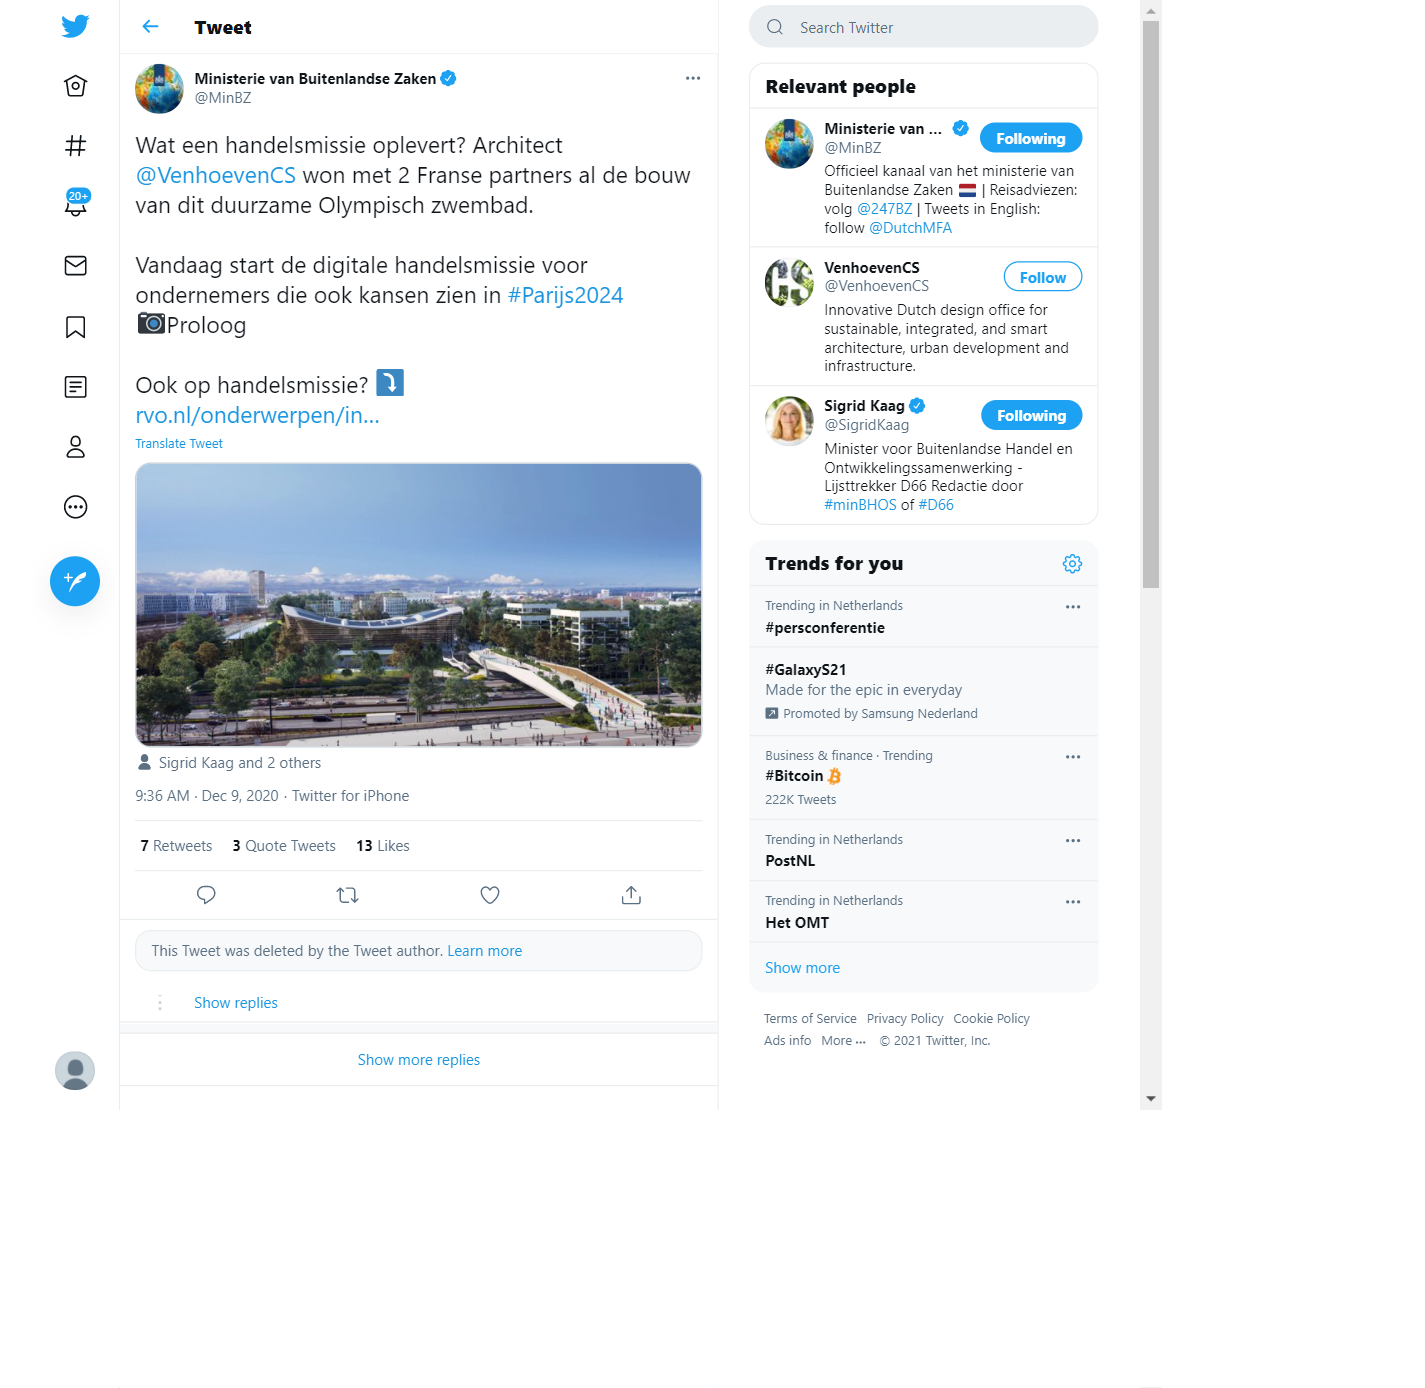

In [17]:
twitter.get_screens(metric='Impressions', method='top', credentials='../data/login_credentials_twitter.json')